In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [149]:
df= pd.read_excel(r"C:\Users\sivap\OneDrive\Documents\Projects\Flight_Ticket_Participant_Datasets-20190305T100527Z-001\Flight_Ticket_Participant_Datasets\Data_Train.xlsx")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
df.shape

(10683, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


- all are object data type except for price, which will be encoded after visualisation
- Arrival_Time, Dep_Time converted to datetime format
- Date_of_Journey to datetime format 
- Duration into integer.

In [150]:
df['Date_of_Journey']= pd.to_datetime(df['Date_of_Journey'],format='%d/%m/%Y')
df['Dep_Time']=pd.to_datetime(df['Dep_Time'])
df['Arrival_Time']=pd.to_datetime(df['Arrival_Time'])

In [6]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-09-02 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-09-02 05:50:00,2022-09-02 13:15:00,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2022-09-02 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2022-09-02 18:05:00,2022-09-02 23:30:00,5h 25m,1 stop,No info,6218
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2022-09-02 16:50:00,2022-09-02 21:35:00,4h 45m,1 stop,No info,13302


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10683 non-null  datetime64[ns]
 6   Arrival_Time     10683 non-null  datetime64[ns]
 7   Duration         10683 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 918.2+ KB


In [10]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

- there is one null value in route and one in total stops

In [11]:
for i in df.columns:
    vc= df[i].value_counts()
    print(vc)
    print('=='*50)

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
2019-05-18    504
2019-06-06    503
2019-05-21    497
2019-06-09    495
2019-06-12    493
2019-05-09    484
2019-03-21    423
2019-05-15    405
2019-03-06    403
2019-05-27    382
2019-06-27    355
2019-06-24    351
2019-06-01    342
2019-06-03    333
2019-06-15    328
2019-03-24    323
2019-03-03    315
2019-03-09    302
2019-03-27    299
2019-05-24    286
2019-05-06    282
2019-05-01    277
2019-05-12    259
2019-04-01    257
2019-03-01    199
2019-03-15    162


In [12]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

- we can observe duplicate values here which will be handled

In [13]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


## Data cleaning

In [151]:
##removing duplicates
df['Additional_Info']=df['Additional_Info'].replace('No info','No Info')
df['Airline']=df['Airline'].replace('Multiple carriers Premium economy','Multiple carriers')
df['Airline']=df['Airline'].replace('Jet Airways Business','Jet Airways')
df['Airline']=df['Airline'].replace('Vistara Premium economy','Vistara')
                 

In [152]:
#Convertion from object to date time 
df['Day']= pd.to_datetime(df['Date_of_Journey'],format='%d/%m/%Y',).dt.day
df['Month']= pd.to_datetime(df['Date_of_Journey'],format='%d/%m/%Y').dt.month
#No seperate column for year is made since the data contains only 2019 data. 

#dropping Date of journey
df.drop('Date_of_Journey',axis=1,inplace =True)

In [153]:
#Convertion from object to date time for Dep_Time
df['Dep_Time_hour']= pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_Time_min']= pd.to_datetime(df['Dep_Time']).dt.minute
df.drop('Dep_Time',axis=1,inplace =True)

In [154]:
#Convertion from object to date time for Arrival_Time

df['Arrival_Time_hour']= pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_Time_min']= pd.to_datetime(df['Arrival_Time']).dt.minute
df.drop('Arrival_Time',axis=1,inplace =True)

In [155]:
Hours = []
Mins = []
duration =[]
for i in df['Duration']:
    duration.append(i)
d=[]
for m in duration:
    d.append(m.split('h'))
for n in d:
    Hours.append(n[0])
    Mins.append(n[1:])
        

In [156]:
df['Dur_Hours']= Hours

In [157]:
df['Dur_Min']= Mins

In [158]:
df['Dur_Min']= df['Dur_Min'].str[0]

In [159]:
df['Dur_Min']= df['Dur_Min'].str.replace('m','')

In [162]:
df['Dur_Min']= df['Dur_Min'].replace('',np.nan)

In [160]:
df.drop('Duration',axis=1)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day,Month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Dur_Hours,Dur_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No Info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No Info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No Info,13882,9,6,9,25,4,25,19,
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No Info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No Info,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No Info,4107,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No Info,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No Info,7229,27,4,8,20,11,20,3,
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No Info,12648,1,3,11,30,14,10,2,40


In [163]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Dur_Hours,Dur_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No Info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No Info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No Info,13882,9,6,9,25,4,25,19,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No Info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No Info,13302,1,3,16,50,21,35,4,45


## Handling missing values

In [164]:
df.isnull().sum()

Airline                 0
Source                  0
Destination             0
Route                   1
Duration                0
Total_Stops             1
Additional_Info         0
Price                   0
Day                     0
Month                   0
Dep_Time_hour           0
Dep_Time_min            0
Arrival_Time_hour       0
Arrival_Time_min        0
Dur_Hours               0
Dur_Min              1032
dtype: int64

In [165]:
df.drop(index= 9039, inplace=True) # removing the row that contains Nan in route and Total_Stops

In [166]:
df.reset_index()

,index,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Dur_Hours,Dur_Min
0,0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No Info,3897,24,3,22,20,1,10,2,50
1,1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No Info,7662,1,5,5,50,13,15,7,25
2,2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No Info,13882,9,6,9,25,4,25,19,NaN
3,3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No Info,6218,12,5,18,5,23,30,5,25
4,4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No Info,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No Info,4107,9,4,19,55,22,25,2,30
10678,10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No Info,4145,27,4,20,45,23,20,2,35
10679,10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,non-stop,No Info,7229,27,4,8,20,11,20,3,NaN
10680,10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No Info,12648,1,3,11,30,14,10,2,40


In [167]:
df['Dur_Min']=df['Dur_Min'].fillna(0)

In [168]:
df.isnull().sum()

Airline              0
Source               0
Destination          0
Route                0
Duration             0
Total_Stops          0
Additional_Info      0
Price                0
Day                  0
Month                0
Dep_Time_hour        0
Dep_Time_min         0
Arrival_Time_hour    0
Arrival_Time_min     0
Dur_Hours            0
Dur_Min              0
dtype: int64

- Now our data is free from null values

## Data Visualization

In [18]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

Jet Airways          3855
IndiGo               2053
Air India            1752
Multiple carriers    1209
SpiceJet              818
Vistara               482
Air Asia              319
GoAir                 194
Trujet                  1
Name: Airline, dtype: int64


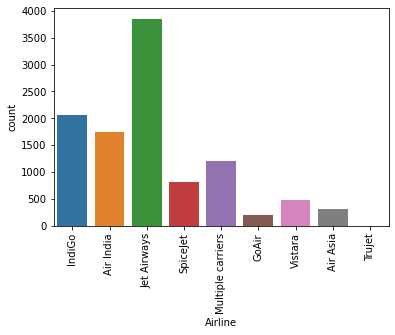

In [54]:
sns.countplot(df['Airline'])
print(df['Airline'].value_counts())
plt.xticks(rotation=90)
plt.show()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64


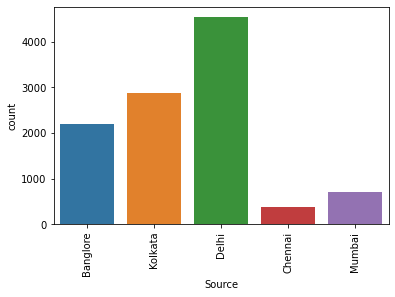

In [55]:
sns.countplot(df['Source'])
print(df['Source'].value_counts())
plt.xticks(rotation=90)
plt.show()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64


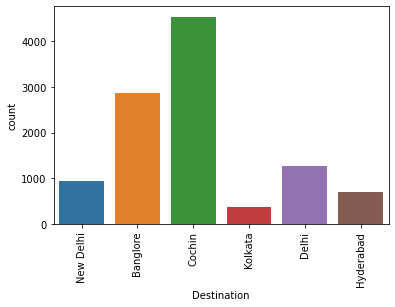

In [56]:
sns.countplot(df['Destination'])
print(df['Destination'].value_counts())
plt.xticks(rotation=90)
plt.show()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64


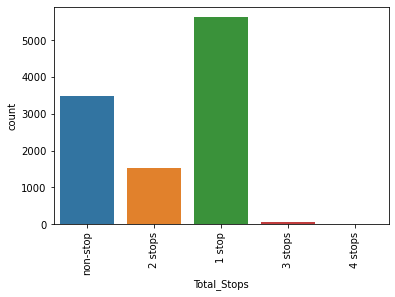

In [57]:
sns.countplot(df['Total_Stops'])
print(df['Total_Stops'].value_counts())
plt.xticks(rotation=90)
plt.show()

### Distribution of price

<AxesSubplot:xlabel='Price', ylabel='Density'>

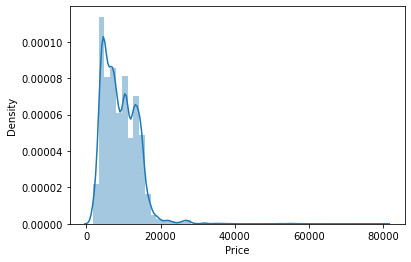

In [139]:
sns.distplot(df['Price'])

- we can see that the price is skewed to the right

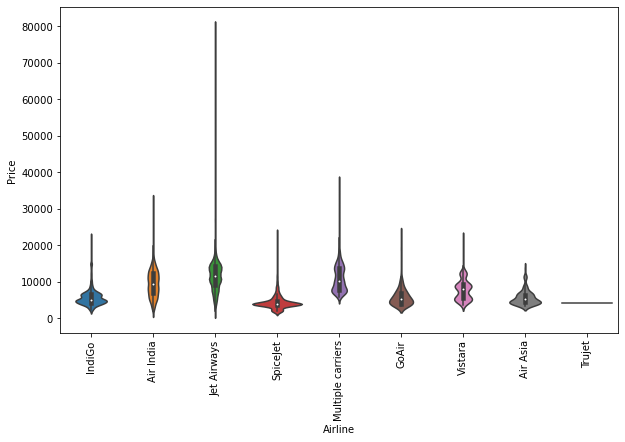

In [71]:
plt.figure(figsize=(10,6))
sns.violinplot(x= 'Airline',y='Price',data= df)
plt.xticks(rotation= 90)
plt.show()

- we can observe that price of Jet Airways varies the most, it has values ranging from low to as high as Rs.80,000
- Indigo, Spicejet,GoAir, Asia provides more tickets at lower values.

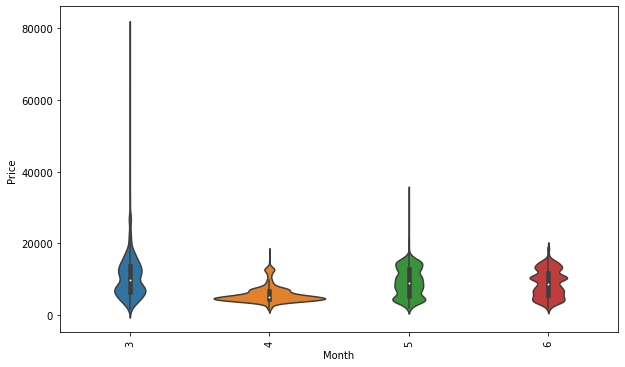

In [132]:
plt.figure(figsize=(10,6))
sns.violinplot(x= 'Month',y='Price',data= df)
plt.xticks(rotation= 90)
plt.show()

- April seems to be the month where more lower priced tickets are sold

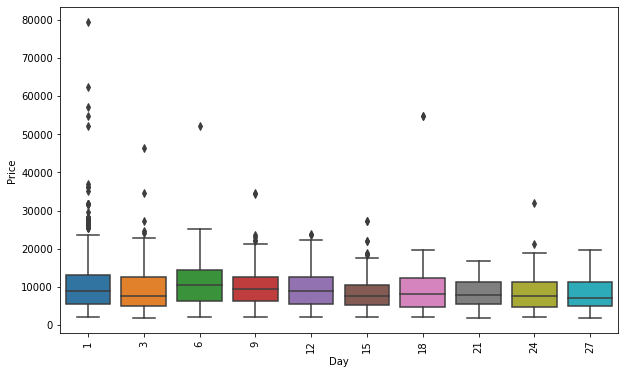

In [135]:
plt.figure(figsize=(10,6))
sns.boxplot(x= 'Day',y='Price',data= df)
plt.xticks(rotation= 90)
plt.show()

- prominant trend cannot be observed here

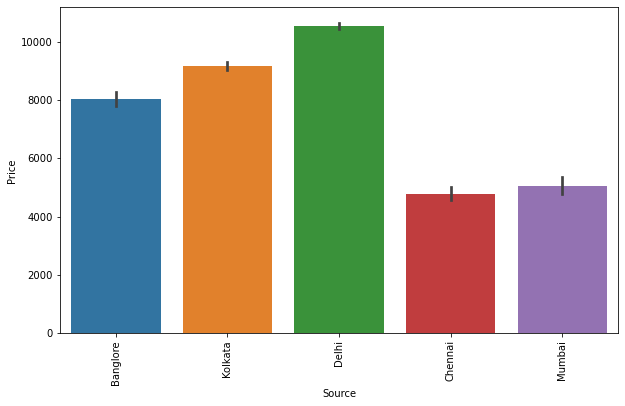

In [77]:
plt.figure(figsize=(10,6))
sns.barplot(x= 'Source',y='Price',data= df)
plt.xticks(rotation= 90)
plt.show()

- When the source is Delhi, the price is seen to be the highest while price seems to be least when source is Chennai

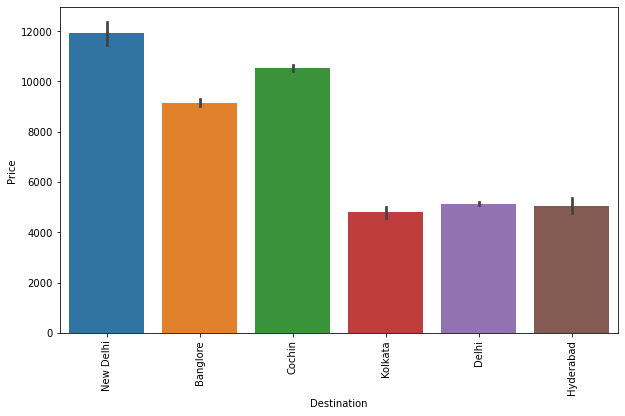

In [78]:
plt.figure(figsize=(10,6))
sns.barplot(x= 'Destination',y='Price',data= df)
plt.xticks(rotation= 90)
plt.show()

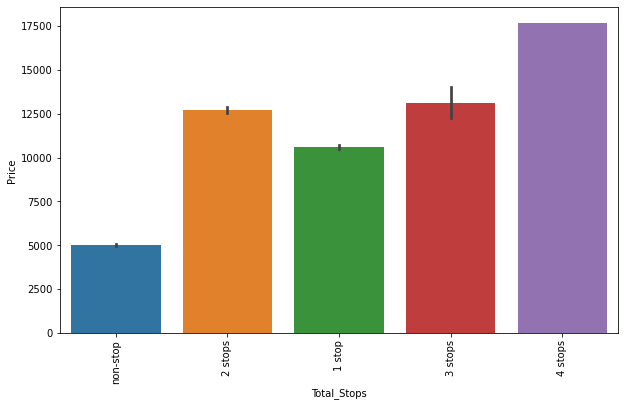

In [79]:
plt.figure(figsize=(10,6))
sns.barplot(x= 'Total_Stops',y='Price',data= df)
plt.xticks(rotation= 90)
plt.show()

- Price is seen  to be high when the flight has 4 stops and is minimum when there are no stops

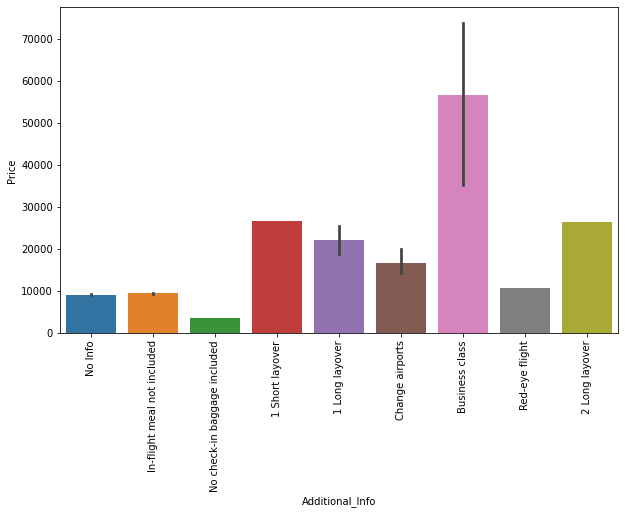

In [80]:
plt.figure(figsize=(10,6))
sns.barplot(x= 'Additional_Info',y='Price',data= df)
plt.xticks(rotation= 90)
plt.show()

- When it is Business class the price is really high

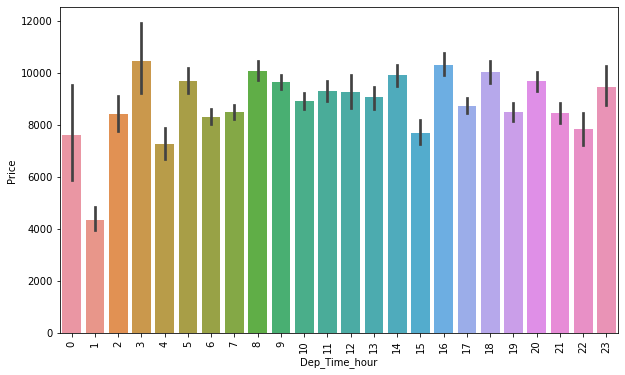

In [83]:
plt.figure(figsize=(10,6))
sns.barplot(x= 'Dep_Time_hour',y='Price',data= df)
plt.xticks(rotation= 90)
plt.show()

- No trend is observed here

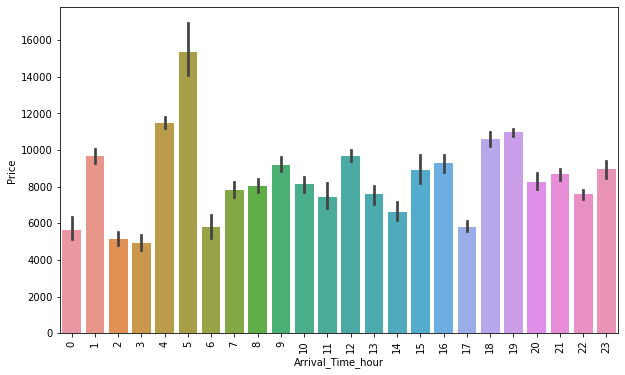

In [93]:
plt.figure(figsize=(10,6))
sns.barplot(x= 'Arrival_Time_hour',y='Price',data= df)
plt.xticks(rotation= 90)
plt.show()

- No trend is observed here

## Encoding

In [198]:
df_new= df[['Airline', 'Source', 'Destination', 'Total_Stops',
       'Additional_Info', 'Price', 'Day', 'Month', 'Dep_Time_hour',
       'Dep_Time_min', 'Arrival_Time_hour', 'Arrival_Time_min', 'Dur_Hours',
       'Dur_Min']]

In [199]:
df_new['Dur_Min']=df_new['Dur_Min'].astype('int64')

In [200]:
pd.set_option('display.max_columns',None)

In [201]:
from sklearn.preprocessing import LabelEncoder
enc= LabelEncoder()
for i in df_new.columns:
    if df_new[i].dtype== 'object':
        df_new[i] = enc.fit_transform(df_new[i].values)

In [202]:
df_new = pd.get_dummies(data=df_new, columns= ['Airline', 'Source','Destination'])
df_new

,Total_Stops,Additional_Info,Price,Day,Month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Dur_Hours,Dur_Min,Airline_0,Airline_1,Airline_2,Airline_3,Airline_4,Airline_5,Airline_6,Airline_7,Airline_8,Source_0,Source_1,Source_2,Source_3,Source_4,Destination_0,Destination_1,Destination_2,Destination_3,Destination_4,Destination_5
0,4,6,3897,24,3,22,20,1,10,11,50,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,1,6,7662,1,5,5,50,13,15,41,25,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,1,6,13882,9,6,9,25,4,25,10,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,0,6,6218,12,5,18,5,23,30,38,25,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4,0,6,13302,1,3,16,50,21,35,33,45,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,4,6,4107,9,4,19,55,22,25,11,30,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
10679,4,6,4145,27,4,20,45,23,20,11,35,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
10680,4,6,7229,27,4,8,20,11,20,22,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
10681,4,6,12648,1,3,11,30,14,10,11,40,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1


## Correlation

In [205]:
corr =df_new.corr()

<AxesSubplot:>

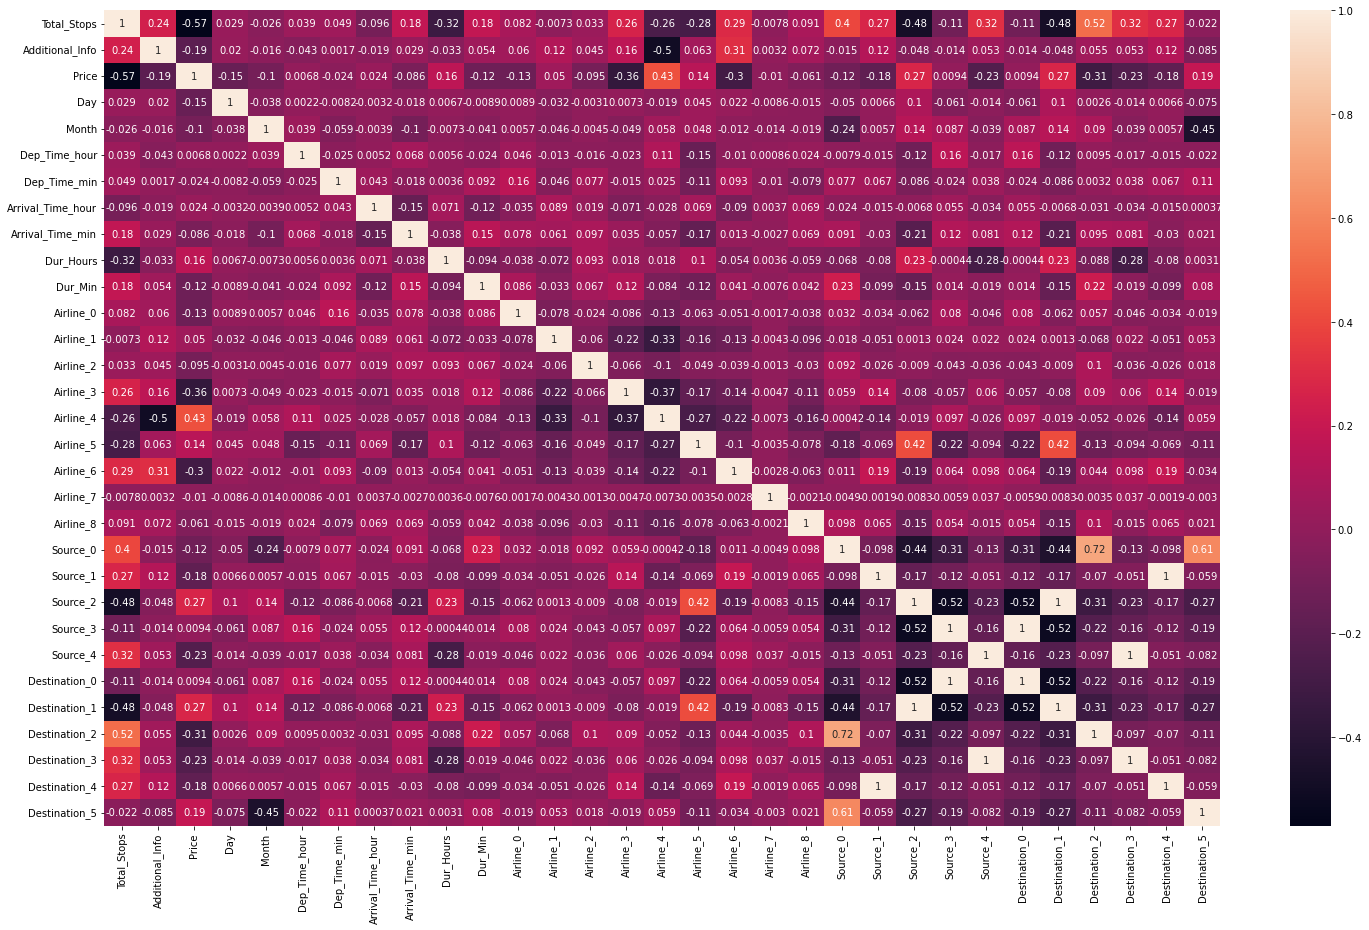

In [210]:
plt.figure(figsize=(25,15))
sns.heatmap(corr,annot=True)

In [204]:
X= df_new.drop('Price', axis=1)
y=df_new['Price']

## Scaling Data

In [211]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X= scaler.fit_transform(X)
X= pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,1.407210,0.331448,1.237288,-1.467402,1.654154,-0.234950,-1.800436,-0.890014,-0.416188,1.279015,-0.17545,-0.442785,-0.136005,2.050151,-0.751445,-0.357248,-0.287972,-0.009676,-0.217382,1.965219,-0.192319,-0.859093,-0.606266,-0.264206,-0.606266,-0.859093,-0.366513,-0.264206,-0.192319,3.234405
1,-0.253703,0.331448,-1.475307,0.250289,-1.303113,1.363607,-0.050909,-0.587094,1.743396,-0.196283,-0.17545,2.258432,-0.136005,-0.487769,-0.751445,-0.357248,-0.287972,-0.009676,-0.217382,-0.508849,-0.192319,-0.859093,1.649441,-0.264206,1.649441,-0.859093,-0.366513,-0.264206,-0.192319,-0.309176
2,-0.253703,0.331448,-0.531796,1.109135,-0.607286,0.031476,-1.363054,0.018745,-0.488174,-1.671580,-0.17545,-0.442785,-0.136005,-0.487769,1.330769,-0.357248,-0.287972,-0.009676,-0.217382,-0.508849,-0.192319,1.164018,-0.606266,-0.264206,-0.606266,1.164018,-0.366513,-0.264206,-0.192319,-0.309176
3,-0.807341,0.331448,-0.177979,0.250289,0.958326,-1.034229,1.407030,0.321664,1.527438,-0.196283,-0.17545,-0.442785,-0.136005,2.050151,-0.751445,-0.357248,-0.287972,-0.009676,-0.217382,-0.508849,-0.192319,-0.859093,1.649441,-0.264206,1.649441,-0.859093,-0.366513,-0.264206,-0.192319,-0.309176
4,-0.807341,0.331448,-1.475307,-1.467402,0.610412,1.363607,1.115442,0.624584,1.167507,0.983955,-0.17545,-0.442785,-0.136005,2.050151,-0.751445,-0.357248,-0.287972,-0.009676,-0.217382,1.965219,-0.192319,-0.859093,-0.606266,-0.264206,-0.606266,-0.859093,-0.366513,-0.264206,-0.192319,3.234405


## Model Building

In [212]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score


In [215]:
#Selecting the best random state

MaxR2 = 0
MaxRS =0
for i in range(1,100):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=i)
    r = RandomForestRegressor()
    r.fit(X_train,y_train)
    predr= r.predict(X_test)
    acc= r2_score(y_test,predr)
    print('accuracy',acc,'random_state',1)
    
    if acc>MaxR2:
        MaxR2=acc
        MaxRS= i
print('Best r2 score is', MaxR2,'at random state', MaxRS)

accuracy 0.8926466327550668 random_state 1
accuracy 0.8789557713128489 random_state 1
accuracy 0.848100719078385 random_state 1
accuracy 0.8928973347335905 random_state 1
accuracy 0.8856443510209052 random_state 1
accuracy 0.8581053709584656 random_state 1
accuracy 0.9082001792282361 random_state 1
accuracy 0.8861629447370616 random_state 1
accuracy 0.8900156356984354 random_state 1
accuracy 0.8731892654572805 random_state 1
accuracy 0.8716410148735769 random_state 1
accuracy 0.8653698284387462 random_state 1
accuracy 0.8881447985767263 random_state 1
accuracy 0.8964764077936194 random_state 1
accuracy 0.8519144550828748 random_state 1
accuracy 0.8614544366923741 random_state 1
accuracy 0.8831156244228542 random_state 1
accuracy 0.7783936577996573 random_state 1
accuracy 0.8794218434441544 random_state 1
accuracy 0.8576011746113185 random_state 1
accuracy 0.8855062306085104 random_state 1
accuracy 0.8882424777866691 random_state 1
accuracy 0.8821615363533166 random_state 1
accuracy 0.8

In [216]:
X_train, X_test,y_train, y_test= train_test_split(X,y, test_size=.30, random_state=98)

In [219]:
algorithm = [LinearRegression(),RandomForestRegressor(),KNeighborsRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),SVR()]
for i in algorithm:
    print(i)
    i.fit(X_train,y_train)
    pred = i.predict(X_test)
    
    print('R2 score: ',r2_score(y_test,pred))
    print('MAE: ',mean_absolute_error(y_test,pred))
    print('MSE: ',mean_squared_error(y_test,pred))
    print('RMSE: ',np.sqrt(mean_squared_error(y_test,pred)))
    cv = cross_val_score(i,X,y,cv=5)
    
    print('Cross Validation Score: ', cv.mean())
    print('Difference in cross val score', r2_score(y_test,pred)- abs(cv.mean()))
    print('**'*50)

LinearRegression()
R2 score:  -265301456553171.4
MAE:  1266993728.9062004
MSE:  5.144884065271834e+21
RMSE:  71727847209.2383
Cross Validation Score:  -3.474284281703753e+24
Difference in cross val score -3.474284281969054e+24
****************************************************************************************************
RandomForestRegressor()
R2 score:  0.915023219797345
MAE:  630.3533682638734
MSE:  1647920.3999210722
RMSE:  1283.7135194119724
Cross Validation Score:  0.8942754428059227
Difference in cross val score 0.020747776991422273
****************************************************************************************************
KNeighborsRegressor()
R2 score:  0.8166130889787141
MAE:  1080.1751014040562
MSE:  3556348.3463338534
RMSE:  1885.8282918478697
Cross Validation Score:  0.7887127540095438
Difference in cross val score 0.027900334969170326
****************************************************************************************************
AdaBoostRegressor()
R2 s

- RandomForestRegressor has the best R2 score 91.5% and a cross validation score of 89.42%.  Hence selecting it as the best model.

In [234]:
rf =RandomForestRegressor()

In [235]:
rf.fit(X_train,y_train)
pred = rf.predict(X_test)
    
print('R2 score: ',r2_score(y_test,pred))
print('MAE: ',mean_absolute_error(y_test,pred))
print('MSE: ',mean_squared_error(y_test,pred))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,pred)))

R2 score:  0.9171914745742829
MAE:  631.4118682179494
MSE:  1605872.310188547
RMSE:  1267.2301725371547


## Saving Model

In [237]:
import joblib

In [238]:
joblib.dump(rf,'FlightPricePrediction.pkl')

['FlightPricePrediction.pkl']